In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('./storereview.csv')
df.head(3)

,더 키친 일뽀르노 청담점,서울 강남구 언주로164길 29,"화이트데이 데이트로 런치세트 맛있게 먹고왔어요!\n\n요즘 날씨가 따듯해서 테라스 자리에 앉으면\n뷰도 좋고 햇살도 잘 들어와서 사도 인생사진,,!\n\n선택메뉴인데 주문한 메뉴들 다 성공적이었구,\n좀 더 더워지면 화덕피자에 생맥주 하러 오려구요!\n\n재방문의사 100% 있음!"
0,더 키친 일뽀르노 청담점,서울 강남구 언주로164길 29,테라스는 추워서 못 앉아서 아쉽네요\n음식이 맛있고 만족스러웠어요\n커피는 1번 리...
1,더 키친 일뽀르노 청담점,서울 강남구 언주로164길 29,"두번째 방문,\n 새로움이 가득한 곳입니다.\n특별한 식사를 위한 공간...\n샐러..."
2,더 키친 일뽀르노 청담점,서울 강남구 언주로164길 29,일단 예약제여서 \n넘 좋았구요~\n음식은 두말 할것 없이 훌륭했구요~\n직원분들 ...


In [2]:
df=pd.DataFrame(np.vstack([df.columns, df]))
df.rename(columns={0:'name',1:'address',2:'review'},inplace=True)

In [3]:
from konlpy.tag import Okt
t=Okt()
tokens_const=[]
for idx, row in df.iterrows():
    #print(row['review'])
    tokens_const.append(t.morphs(row['review']))

In [4]:
def longerthanone(x):
    return len(x)>1

def engorkr(x):
    if x.isalpha():
        return True
    return False
results = list(filter(longerthanone, tokens_const[0]))
print(type(results))


def my_tokenizer(doc):
    return [
        tt
        for tt in t.morphs(doc)
        if longerthanone(tt) and engorkr(tt)
    ]
print(my_tokenizer(df.review[0]))

<class 'list'>
['화이트데이', '데이트', '런치', '세트', '맛있게', '먹고', '왔어요', '요즘', '날씨', '따듯', '해서', '테라스', '자리', '앉으면', '좋고', '햇살', '들어와서', '사도', '인생', '사진', '선택', '메뉴', '인데', '주문', '메뉴', '성공', '이었구', '더워지면', '화덕', '피자', '생맥주', '하러', '오려구요', '방문', '의사', '있음']


In [5]:
kk=df.review.to_list()
print(type(kk[0]))
print(type(kk))

<class 'str'>
<class 'list'>


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(tokenizer=my_tokenizer,
                    max_features=1000, min_df=5, max_df=0.5)
review_cv = cv.fit_transform(kk)

/Users/munju/opt/anaconda3/envs/nellie/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [7]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
np.set_printoptions(precision=3)

lda = LatentDirichletAllocation(n_components = 10,
                               max_iter=5,
                               topic_word_prior=0.1, doc_topic_prior=1.0,
                               learning_method='online',
                               n_jobs=-1,
                               random_state=0)

review_topics = lda.fit_transform(review_cv)

In [8]:
print(review_topics.shape)
print(type(review_topics))
print(review_topics[0])

(2289, 10)
<class 'numpy.ndarray'>
[0.043 0.342 0.036 0.215 0.037 0.129 0.047 0.045 0.071 0.034]


In [9]:
gross_topic_weights = np.mean(review_topics, axis=0)
print('Sum of topic weights of documents:', gross_topic_weights)

print('#shape of topic word distribution:', lda.components_.shape)

Sum of topic weights of documents: [0.099 0.094 0.1   0.103 0.094 0.101 0.093 0.104 0.115 0.098]
#shape of topic word distribution: (10, 1000)


In [10]:
print(type(cv.get_feature_names_out()))
print(cv.get_feature_names_out().shape)
print(cv.get_feature_names_out()[100:120])

<class 'numpy.ndarray'>
(1000,)
['국수' '굿굿' '궁금해서' '궁합' '그거' '그냥' '그대로' '그때' '그래도' '그래서' '그런' '그런데' '그런지'
 '그렇게' '그릇' '그리고' '그만큼' '근데' '근처' '금방']


In [11]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(
            ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]])
        )
    print()
    
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: 음식, 고기, 입니다, 정말, 맛있습니다, 좋았어요, 너무, 시간, 에서, 좋은
Topic #1: 너무, 맛있게, 먹었습니다, 좋아요, 좋았어요, 좋은, 분위기, 음식, 좋고, 까지
Topic #2: 으로, 맛있어요, 크림, 베이글, 방문, 초코, 이에요, 에서, 리뷰, 먹어
Topic #3: 주문, 메뉴, 스테이크, 까지, 가격, 분위기, 했는데, 방문, 서비스, 정말
Topic #4: 국물, 맛있어요, 이랑, 마늘, 진짜, 너무, 양도, 많고, 떡볶이, 해서
Topic #5: 너무, 파스타, 피자, 치즈, 진짜, 맛있어요, 메뉴, 소스, 맛있었어요, 매콤
Topic #6: 너무, 맛있었어요, 음식, 맛집, 사람, 처음, 자주, 안주, 으로, 좋아하는
Topic #7: 직원, 분들, 너무, 친구, 매장, 분위기, 엄청, ㅎㅎ, 방문, 다음
Topic #8: 정도, 웨이, 대기, 테이블, 생각, 으로, 하고, 평일, 보다, 그냥
Topic #9: 맛있어요, 하나, 너무, 최고, 식사, 에서, 맛있고, 진짜, 여기, 음식



n_components: 6, perplexity: 744.831
n_components: 7, perplexity: 771.146
n_components: 8, perplexity: 811.850
n_components: 9, perplexity: 845.119
n_components: 10, perplexity: 890.280
n_components: 11, perplexity: 925.479
n_components: 12, perplexity: 970.370
n_components: 13, perplexity: 1012.027
n_components: 14, perplexity: 1053.759
n_components: 15, perplexity: 1102.217


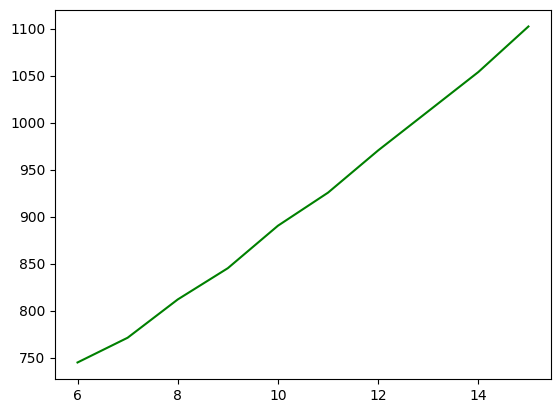

n_components with minimum perplexity: 6


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior=0.1,
                   doc_topic_prior=1.0):
    iter_num = []
    per_value = []
    for i in range(start, end+1):
        lda = LatentDirichletAllocation(n_components=i, max_iter=max_iter,
                                       topic_word_prior=topic_word_prior,
                                       doc_topic_prior=doc_topic_prior,
                                       learning_method='batch', n_jobs=-1,
                                       random_state=7)
        lda.fit(cv)
        iter_num.append(i)
        pv=lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')
    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start+per_value.index(min(per_value))

print("n_components with minimum perplexity:",
     show_perplexity(review_cv, start=6, end=15))

In [13]:
lda = LatentDirichletAllocation(n_components = 6,
                               max_iter=20,
                               topic_word_prior=0.1, doc_topic_prior=1.0,
                               learning_method='batch',
                               n_jobs=-1,
                               random_state=7)

review_topics = lda.fit_transform(review_cv)
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: 음식, 너무, 방문, 직원, 분위기, 에서, 분들, 좋은, 하나, 식사
Topic #1: 진짜, 맛있게, ㅎㅎ, 맛있었어요, 이랑, 맛있어요, 너무, 으로, 먹었어요, 치즈
Topic #2: 국물, 같아요, 먹어, 정도, 곱창, 다른, 느낌, 조금, 가격, 탕수육
Topic #3: 피자, 까지, 메뉴, 파스타, 으로, 보다, 방문, 생각, 주문, 부터
Topic #4: 웨이, 소스, 테이블, 스테이크, 시간, 대기, 주문, 했는데, 하고, 웨이팅
Topic #5: 너무, 맛있어요, 좋아요, 분위기, 매장, 맛있고, 인테리어, 있어서, 맛집, 좋고



In [14]:
print(cv.get_feature_names_out())

['la' 'ㅋㅋ' 'ㅋㅋㅋ' 'ㅋㅋㅋㅋ' 'ㅎㅎ' 'ㅎㅎㅎ' 'ㅜㅜ' 'ㅠㅠ' 'ㅠㅠㅠ' '가게' '가격' '가고' '가기'
 '가는' '가능' '가능해서' '가니' '가도' '가득' '가라아게' '가로수길' '가면' '가볍게' '가보고' '가봤는데'
 '가서' '가성' '가세' '가야' '가우' '가장' '가족' '가지' '간격' '간도' '간만' '간이' '간장' '갈게요'
 '갈비' '감동' '감사합니다' '감성' '감자' '감자전' '감칠맛' '갑니다' '갔는데' '갔다' '갔다가' '갔더니'
 '갔어요' '갔을' '강남' '강남역' '강추' '같고' '같네요' '같습니다' '같아' '같아서' '같아요' '같은' '같은데'
 '같음' '같이' '개인' '거의' '걱정' '건지' '걸고' '걸어' '검색' '겉바' '게살' '겨울' '경험' '곁들여'
 '계란' '계란빵' '계산' '계속' '고급' '고기' '고기국수' '고민' '고소하고' '고소한' '고추' '곱창' '곱창전골'
 '공간' '괜찮았어요' '굉장히' '구매' '구성' '구워' '구워주셔서' '구이' '국물' '국수' '굿굿' '궁금해서' '궁합'
 '그거' '그냥' '그대로' '그때' '그래도' '그래서' '그런' '그런데' '그런지' '그렇게' '그릇' '그리고' '그만큼'
 '근데' '근처' '금방' '기념' '기념일' '기는' '기다려서' '기다리고' '기다린' '기대' '기도' '기름' '기본'
 '기분' '기억' '기준' '김밥' '김치' '김치볶음밥' '까지' '깔끔하게' '깔끔하고' '깔끔한' '깔끔해서' '깨끗하고'
 '께서' '꼬치' '나게' '나고' '나쁘지' '나서' '나오고' '나오는' '나오는데' '나온' '나와서' '나와요' '나왔어요'
 '나중' '낙지' '날씨' '남자' '남자친구' '났어요' '내부' '냄새' '냉면' '너무' '넓고' '넓어서' '넓은' '넘게'
 '넘나' '넣어' '네이버' '노티' '녹아요' '놀랐어요' '높은' '뇨끼' '느낌' '늦

In [15]:
texts=[my_tokenizer(k) for k in kk]

In [16]:
from gensim.corpora.dictionary import Dictionary

dictionary=Dictionary(texts)
print('#Number of initial unique words in documents:', len(dictionary))

dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))


corpus=[dictionary.doc2bow(text) for text in texts]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 10950
#Number of unique words after removing rare and common words: 1901
#Number of unique tokens: 1901
#Number of documents: 2289


In [17]:
from gensim.models import LdaModel

num_topics=10
passes=5
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                      passes=passes, num_topics=num_topics, \
                      random_state=7)

CPU times: user 3.65 s, sys: 21.7 ms, total: 3.67 s
Wall time: 3.68 s


In [18]:
model.print_topics(num_words=10)

[(0,
  '0.044*"마늘" + 0.041*"떡볶이" + 0.040*"닭똥집" + 0.024*"치즈" + 0.024*"구이" + 0.022*"맛있어요" + 0.018*"너무" + 0.015*"맛집" + 0.014*"양철" + 0.013*"지붕"'),
 (1,
  '0.063*"베이글" + 0.017*"치즈" + 0.011*"맛있어요" + 0.011*"으로" + 0.010*"방문" + 0.010*"사케" + 0.010*"소금" + 0.010*"진짜" + 0.009*"정도" + 0.009*"했는데"'),
 (2,
  '0.021*"너무" + 0.019*"하고" + 0.015*"딸기" + 0.014*"메뉴" + 0.013*"피자" + 0.013*"루프" + 0.013*"방문" + 0.011*"디저트" + 0.010*"케이크" + 0.010*"있어서"'),
 (3,
  '0.023*"스테이크" + 0.016*"베리" + 0.014*"너무" + 0.013*"하고" + 0.013*"맛있어요" + 0.012*"생각" + 0.012*"빠에야" + 0.011*"먹어" + 0.010*"방문" + 0.010*"맛있었어요"'),
 (4,
  '0.014*"으로" + 0.013*"해서" + 0.013*"정말" + 0.011*"베이글" + 0.011*"정도" + 0.011*"추천" + 0.010*"대기" + 0.010*"방문" + 0.010*"메뉴" + 0.009*"테이블"'),
 (5,
  '0.016*"음식" + 0.016*"맛있게" + 0.015*"직원" + 0.014*"먹었어요" + 0.012*"먹고" + 0.011*"같아요" + 0.011*"하고" + 0.011*"예약" + 0.010*"정말" + 0.010*"메뉴"'),
 (6,
  '0.052*"너무" + 0.027*"맛있어요" + 0.026*"분위기" + 0.022*"음식" + 0.021*"진짜" + 0.016*"직원" + 0.013*"분들" + 0.012*"ㅠㅠ" + 0.012*"좋아요" + 0.012*"메뉴"')

In [19]:
topics = model.show_topics(num_words=10, formatted=False)
for topic in topics:
    print(f"Topic {topic[0]}: {' '.join(word[0] for word in topic[1])}")

Topic 0: 마늘 떡볶이 닭똥집 치즈 구이 맛있어요 너무 맛집 양철 지붕
Topic 1: 베이글 치즈 맛있어요 으로 방문 사케 소금 진짜 정도 했는데
Topic 2: 너무 하고 딸기 메뉴 피자 루프 방문 디저트 케이크 있어서
Topic 3: 스테이크 베리 너무 하고 맛있어요 생각 빠에야 먹어 방문 맛있었어요
Topic 4: 으로 해서 정말 베이글 정도 추천 대기 방문 메뉴 테이블
Topic 5: 음식 맛있게 직원 먹었어요 먹고 같아요 하고 예약 정말 메뉴
Topic 6: 너무 맛있어요 분위기 음식 진짜 직원 분들 ㅠㅠ 좋아요 메뉴
Topic 7: 음식 너무 테이블 으로 주문 맛있습니다 맛있는 하나 메뉴 입니다
Topic 8: 너무 직원 음식 으로 풍자 식사 분들 매장 다른 에서
Topic 9: 해물 점심 진짜 으로 특선 안주 최고 까지 먹고 추천


In [20]:
print(topics[0])

(0, [('마늘', 0.043700743), ('떡볶이', 0.040691555), ('닭똥집', 0.039520595), ('치즈', 0.024432207), ('구이', 0.02392902), ('맛있어요', 0.022131883), ('너무', 0.01849525), ('맛집', 0.014644362), ('양철', 0.013715293), ('지붕', 0.01299002)])


In [21]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

lda_viz=gensimvis.prepare(model, corpus, dictionary)
lda_viz

/Users/munju/opt/anaconda3/envs/nellie/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.054056  0.049344       1        1  14.509139
8     -0.078979 -0.127067       2        1  12.174563
5     -0.069768 -0.094290       3        1  11.893298
2     -0.011853  0.021761       4        1  11.468223
6      0.028821 -0.140249       5        1  11.345774
7     -0.011203 -0.061015       6        1   9.645160
3     -0.085131  0.117171       7        1   9.224760
1     -0.093272  0.157303       8        1   7.008660
9      0.189372 -0.005649       9        1   6.892433
0      0.186069  0.082692      10        1   5.837989, topic_info=       Term        Freq       Total Category  logprob  loglift
1769    베이글  325.000000  325.000000  Default  30.0000  30.0000
1247     마늘  140.000000  140.000000  Default  29.0000  29.0000
1764    떡볶이  166.000000  166.000000  Default  28.0000  28.0000
979      해물  168.000000  168.000000  Default  27.0000  27.0000
1898    닭똥집  138.000000  138.000000  Default  26.0000  26.0000
...     ...         ...         ...      ...      ...      ...
285      진짜   27.746627  392.414123  Topic10  -4.6005   0.1916
309    맛있어서   20.006494  124.398151  Topic10  -4.9276   1.0134
49       ㅎㅎ   20.628076  243.134694  Topic10  -4.8970   0.3738
38    맛있었어요   19.190778  218.669737  Topic10  -4.9692   0.4077
6        방문   17.715336  384.683418  Topic10  -5.0492  -0.2372

[750 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
985       3  0.173461   ㅋㅋㅋㅋ
985       5  0.057820   ㅋㅋㅋㅋ
985       6  0.057820   ㅋㅋㅋㅋ
985       8  0.693842   ㅋㅋㅋㅋ
849       4  0.856338  ㅋㅋㅋㅋㅋ
...     ...       ...    ...
788       2  0.162914     홍콩
788       5  0.733115     홍콩
788       6  0.081457     홍콩
600       7  0.902622     회사
1690      2  0.902335     힘든

[1852 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 6, 3, 7, 8, 4, 2, 10, 1])